In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the datasets
sales = pd.read_csv('../data/raw/sales_train_validation.csv')
calendar = pd.read_csv('../data/raw/calendar.csv')
prices = pd.read_csv('../data/raw/sell_prices.csv')

In [15]:
# Datasets sanity check
print(sales.shape, calendar.shape, prices.shape)
sales.head()
sales.isna().sum().sum() 

(30490, 1919) (1969, 14) (6841121, 4)


np.int64(0)

In [16]:
# Preliminary data transformation
sales_long = sales.melt(
    id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
    var_name='d', value_name='sales'
)
calendar['d'] = calendar['d'].astype(str)
sales_merged = sales_long.merge(calendar, on='d', how='left')

In [17]:
# Create a lightweight sample for testing in data/processed/
sample = sales_merged.query("store_id == 'CA_1' and dept_id == 'FOODS_1'")
sample.to_csv("../data/processed/sample_CA1_FOODS1.csv", index=False)

count    413208.000000
mean          1.374245
std           3.030868
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          92.000000
Name: sales, dtype: float64

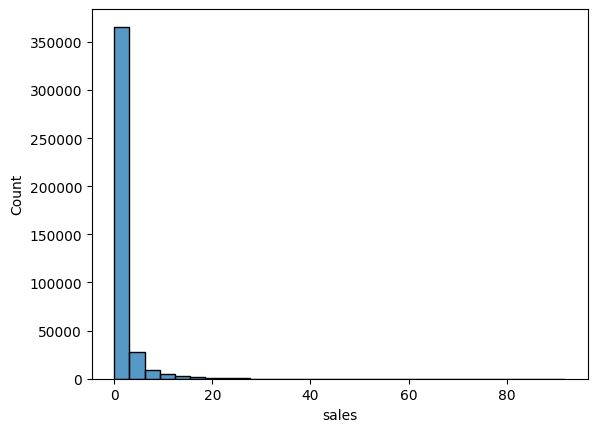

In [18]:
sns.histplot(sample['sales'], bins=30)
sample['sales'].describe()